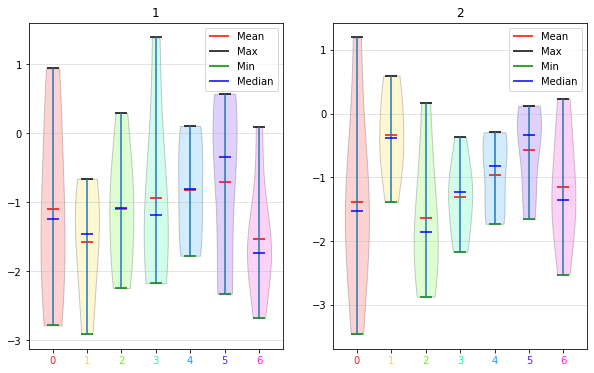

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import colorsys
import os


class DrawViolinplot:
    def __init__(self, length=10, width=6, r=1, c=1):
        '''
        小提琴图绘制
        :param length: float; 图片的长度, 单位一般是100像素
        :param width: float; 图片的宽度/高度, 单位一般是100像素
        :param r: int; 几行
        :param c: int; 几列
        :return:
        '''
        self.fig, self.axes = plt.subplots(nrows=r, ncols=c, figsize=(length, width))
        if r <= 1 and c <= 1:
            self.axes = [self.axes]

    def set_one(self, all_data, xaxis_name, xlabel_name=None, ylabel_name=None, ygrid_alpha=0.4, title=None,
                diff_color=True, violin_width=0.7, violin_alpha=0.2, n=1):
        '''
        增加一个小提琴图绘制
        :param all_data: [[数据1值1,..],..]; 二维列表, 每行一个数据
        :param xaxis_name: [名称1,..]; 每个数据的名称
        :param xlabel_name: str or None; x轴坐标名称
        :param ylabel_name: str or None; y轴坐标名称
        :param ygrid_alpha: float; y轴网格的不透明度
        :param title: str or None; 标题
        :param diff_color: bool; 是否每个violin不同颜色
        :param violin_width: float; 每个violin的宽度, 百分比
        :param violin_alpha: float; violin的不透明度
        :param n: int; 第几个图, 从1开始, 先行后列
        :return:
        '''
        # 初始化
        axes = self.axes[n - 1]
        violin_parts = axes.violinplot(all_data, showmeans=True, showmedians=True, widths=violin_width)
        # 每个图设置不同颜色
        nc = self.ncolors(len(all_data))
        for i, pc in enumerate(violin_parts['bodies']):
            if diff_color:
                pc.set_facecolor(nc[i])  # 中间颜色
                pc.set_edgecolor('black')  # 边界颜色
            pc.set_alpha(violin_alpha)  # 透明度
        # violinplot 横线颜色
        violin_parts['cmeans'].set_color(['red'] * len(all_data))
        violin_parts['cmins'].set_color(['green'] * len(all_data))
        violin_parts['cmaxes'].set_color(['black'] * len(all_data))
        violin_parts['cmedians'].set_color(['blue'] * len(all_data))
        # violinplot 图例
        violin_parts['cmeans'].set_label('Mean')
        violin_parts['cmins'].set_label('Min')
        violin_parts['cmaxes'].set_label('Max')
        violin_parts['cmedians'].set_label('Median')
        # 参数设置
        if title:  # 标题
            axes.set_title(title)
        if 0 < ygrid_alpha <= 1:  # 网格设置
            axes.yaxis.grid(True, alpha=ygrid_alpha)
        if xlabel_name:  # 横坐标设置
            axes.set_xlabel(xlabel_name)
        if ylabel_name:  # 纵坐标设置
            axes.set_ylabel(ylabel_name)
        plt.setp(axes, xticks=range(1, len(all_data) + 1), xticklabels=xaxis_name)  # 横坐标图名称
        if diff_color:
            [t.set_color(i) for (i, t) in zip(nc, axes.xaxis.get_ticklabels())]
        axes.legend()  # 图例

    def draw(self, save_path=None):
        '''
        :param save_path: str or None; 图片保存路径
        :return:
        '''
        if save_path:
            fname, fextension = os.path.splitext(save_path)
            plt.tight_layout()
            plt.savefig(save_path, format=fextension[1:])
        plt.show()  # 绘制
        plt.close()

    @staticmethod
    def ncolors(n=1):
        rgb_colors = []
        hls_colors = []
        i = 0
        step = 360.0 / n
        while i < 360:
            h = i
            s = 95
            l = 55
            _hlsc = [h / 360.0, l / 100.0, s / 100.0]
            hls_colors.append(_hlsc)
            i += step
        for hlsc in hls_colors:
            _r, _g, _b = colorsys.hls_to_rgb(hlsc[0], hlsc[1], hlsc[2])
            rgb = [int(x * 255.0) for x in (_r, _g, _b)]
            rgb = [('0' + hex(i)[2:])[-2:] for i in rgb]
            rgb_colors.append('#' + ''.join(rgb))
        return rgb_colors


all_data1 = np.random.normal(-1,1,size=[7,6]).tolist()
all_data2 = np.random.normal(-1,1,size=[7,6]).tolist()
xaxis_name = [i for i in range(7)]

obj = DrawViolinplot(r=1, c=2)
obj.set_one(all_data1, xaxis_name, n=1, title='1')
obj.set_one(all_data2, xaxis_name, n=2, title='2')
obj.draw()